In [38]:
import rasterio

In [39]:
image_path = 'data/batch_001/8928dec4ddbffff/DJI_0876.JPG'

In [40]:
# Open the image and read the bands as numpy arrays
with rasterio.open(image_path) as src:
    blue = src.read(1)
    green = src.read(2)
    red = src.read(3)

/Users/kevinlacaille/.pyenv/versions/3.11.4/envs/scipy2024-env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [41]:
import numpy as np
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [42]:
# Stack the bands to create a color image
rgb = np.dstack((blue, green, red))

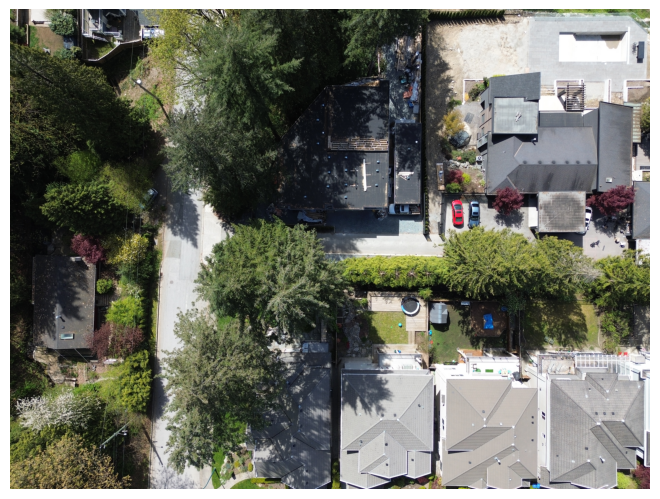

In [43]:
from matplotlib import pyplot as plt
# Visualize the color image
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(rgb)
plt.axis('off')
plt.show()

VARI reference: https://calmit.unl.edu/people/agitelson2/pdf/07_IJRS-2002_23-2002.pdf

In [44]:
vari = (green.astype(float) - red.astype(float)) / (
    green.astype(float) + red.astype(float) - blue.astype(float))

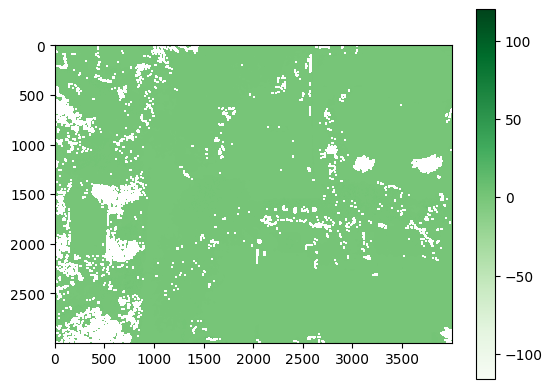

In [45]:
plt.imshow(vari, cmap='Greens')
plt.colorbar()
plt.show()

In [46]:
vari_min = 0.1
vari_max = 0.5

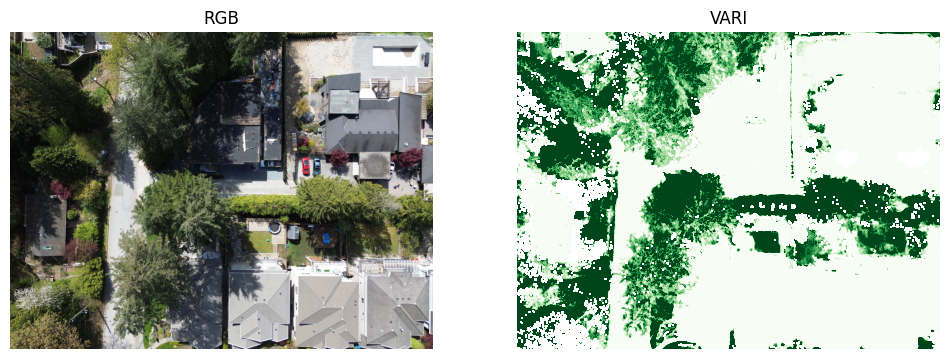

In [47]:
# make a side by side comparison of rgb and vari
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(ax[0])
plt.imshow(rgb)
plt.axis('off')
plt.title('RGB')

plt.sca(ax[1])
plt.imshow(vari, cmap='Greens', vmin=vari_min, vmax=vari_max)
plt.axis('off')
plt.title('VARI')

plt.show()